# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
# Locate the table on the page
table = soup.find('table')

# Extract headers
headers = [header.get_text().strip() for header in table.find_all('th')]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
headers = [header.get_text() for header in table.find_all('th')]
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = [cell.get_text() for cell in row.find_all('td')]
    rows.append(cells)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(rows, columns=headers)

In [9]:
# Confirm DataFrame was created successfully
# Display the DataFrame
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
display(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Convert data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
num_months = mars_weather_df['month'].nunique()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df['sol'].nunique()
print(f"There are {num_sols} sols worth of data in the dataset.")

There are 1867 sols worth of data in the dataset.


In [15]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the results
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


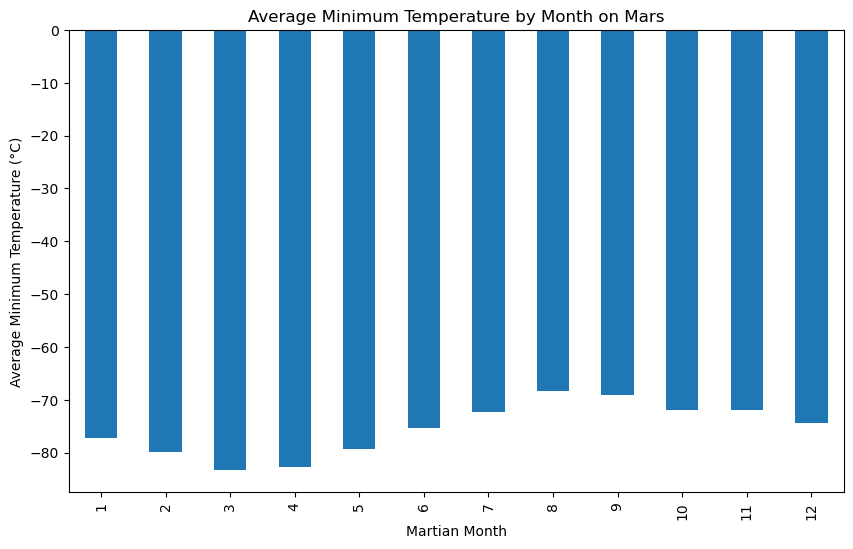

In [16]:
# Plot the average minimum temperature by month
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar')

# Add labels and title
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')

# Show the plot
plt.show()

Average Minimum Temperature by Month (Sorted):
month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


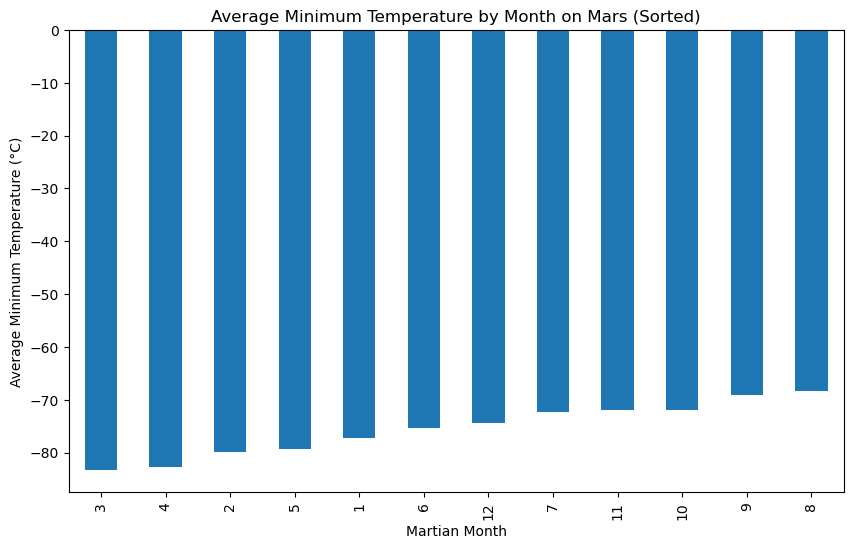

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Display the sorted results
print("Average Minimum Temperature by Month (Sorted):")
print(sorted_avg_min_temp_by_month)

# Plot the sorted results
plt.figure(figsize=(10, 6))
sorted_avg_min_temp_by_month.plot(kind='bar')

# Add labels and title
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars (Sorted)')

# Show the plot
plt.show()

In [18]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Display the results
print("Average Atmospheric Pressure by Month:")
display(avg_pressure_by_month)

Average Atmospheric Pressure by Month:


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

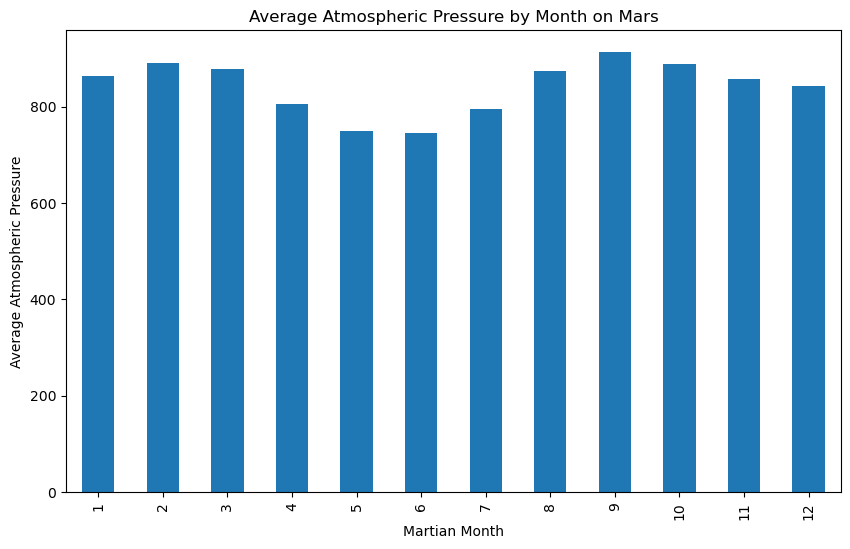

In [19]:
# Plot the average pressure by month
# Calculate the average pressure for each month
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar')

# Add labels and title
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars')

# Show the plot
plt.show()

Average Atmospheric Pressure by Month (Sorted):
month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


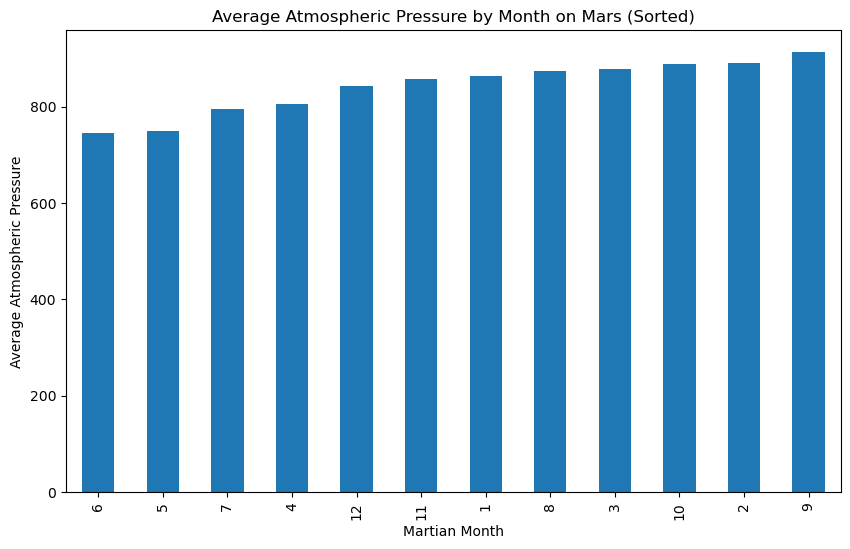

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()

# Display the sorted results
print("Average Atmospheric Pressure by Month (Sorted):")
print(sorted_avg_pressure_by_month)

# Plot the sorted results
plt.figure(figsize=(10, 6))
sorted_avg_pressure_by_month.plot(kind='bar')

# Add labels and title
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars (Sorted)')

# Show the plot
plt.show()

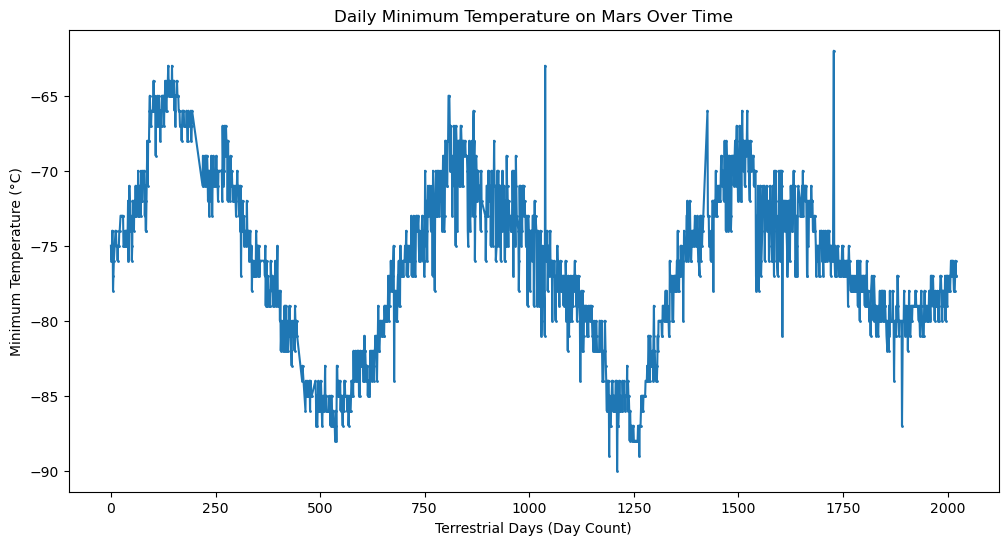

In [24]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Plot daily minimum temperature over terrestrial days
mars_weather_df['day_count'] = (mars_weather_df['terrestrial_date'] - mars_weather_df['terrestrial_date'].min()).dt.days

# Plot daily minimum temperature over terrestrial days
plt.figure(figsize=(12, 6))
plt.plot(mars_weather_df['day_count'], mars_weather_df['min_temp'], marker='.', linestyle='-', markersize=2)

# Add labels and title
plt.xlabel('Terrestrial Days (Day Count)')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars Over Time')

# Show the plot
plt.show()

# Minimum Temperature
## Analysis:
The minimum temperature data on Mars reveals notable seasonal variation, with temperatures reaching their lowest in Martian months 3 and 4, averaging around -83°C. Warmer months, such as 8 and 9, see average minimum temperatures closer to -68°C. This temperature trend aligns with Mars’s position relative to the Sun, impacting seasonal changes. The coldest period corresponds to winter in the Martian hemisphere where Curiosity is located, while warmer months align with its summer. This data indicates extreme temperature fluctuations, showcasing the harsh and varying climate of Mars.

# Atmospheric Pressure
## Analysis:
Atmospheric pressure on Mars also varies with the planet’s seasonal cycles. The analysis shows peak atmospheric pressure in Martian month 9, with values around 913 Pa, and the lowest pressures in months 5 and 6, around 745 Pa. The pressure increases as Mars approaches perihelion (closer to the Sun), resulting in higher temperatures that cause atmospheric gases to expand, raising pressure. Conversely, as Mars moves toward aphelion (farthest from the Sun), temperatures drop, leading to lower pressures. This seasonal pressure variation provides insight into Mars's thin atmosphere and how it responds to orbital changes.

# Year Length
## Analysis:
The length of a Martian year is approximated by observing a full cycle of temperature variations. By plotting daily minimum temperatures over time, we estimate that a Martian year spans about 687 Earth days. This extended year, almost twice as long as Earth’s, is due to Mars’s greater distance from the Sun. The analysis of temperature cycles across this Martian year also helps identify distinct seasonal patterns, with prolonged winters and shorter, less intense summers compared to Earth. This unique yearly structure has implications for future exploration, as seasons influence temperature extremes and atmospheric conditions.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [23]:
browser.quit()